In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the original dataset
VP = pd.read_feather(
    "/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/VP.feather"
    )

# Remove unnecessary variables
exclud_vars_vp = [
    "Ignore",
    "CONTAORE",
    "TOP",
    "TOT",
    "TOV",
    "HWP",
    "AUX_POT_ATT_KW",
    "AUX_TENSIONE",
    "GEN_ENERGY",
    "AUX_ENERGY",
    "Datapoints",
    "FV134"
]

In [55]:
VP = VP.drop(exclud_vars_vp, axis=1)
VP

,Date,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,...,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,TOFS,XT100,PT212
0,2016-12-19 13:22:00,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,...,0.115741,114.53990,251.05610,209.33160,178.9496,100.0,94.84954,1000.000,0.517940,330.2083
1,2016-12-19 13:23:00,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,...,0.104167,114.23610,251.25870,209.83800,178.9496,100.0,94.61806,1000.000,0.703125,330.7292
2,2016-12-19 13:24:00,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,...,0.101273,114.23610,251.36000,209.02780,178.8484,100.0,94.90741,1000.000,0.749421,330.5555
3,2016-12-19 13:25:00,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,...,0.127315,114.53990,251.46120,209.63540,178.7471,100.0,94.82060,1000.000,0.630787,330.2083
4,2016-12-19 13:36:00,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,...,0.130208,115.24880,251.66380,210.04050,178.8484,100.0,94.70486,1000.000,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,2023-03-15 23:55:00,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,...,0.083912,26.12847,59.95370,81.32233,174.7975,0.0,75.72338,342.882,0.584491,347.3958
3199848,2023-03-15 23:56:00,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,...,0.078125,26.02720,59.95370,81.32233,174.5949,0.0,75.69444,342.882,0.570023,347.2222
3199849,2023-03-15 23:57:00,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,...,0.083912,26.02720,59.95370,81.32233,174.4936,0.0,75.75231,342.882,0.567130,347.5695
3199850,2023-03-15 23:58:00,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,...,0.083912,26.02720,59.85243,81.32233,174.3924,0.0,75.69444,342.882,0.561343,347.3958


In [56]:
VP.columns

Index(['Date', 'TOV_POS', 'TT100', 'TT101', 'TT102', 'TT103', 'TT104', 'TT105',
       'TT106', 'TT108', 'TT109', 'TT110', 'TT112', 'TT119', 'TT120', 'TT121',
       'TT122', 'TT123', 'TT124', 'TT125', 'TT126', 'TT210', 'TT212',
       'GEN_POT_ATT_KW', 'GEN_TENSIONE', 'CPT104', 'CPT105', 'DPT113', 'IC113',
       'ST102', 'XT101', 'TT127', 'TT128', 'TT129', 'TT130', 'FCV134',
       'TOVSPOS', 'TOFS', 'XT100', 'PT212'],
      dtype='object')

In [57]:
VP.shape

(3199852, 40)

In [58]:
VP_nonan = VP.dropna()
VP_nonan

,Date,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,...,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,TOFS,XT100,PT212
0,2016-12-19 13:22:00,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,...,0.115741,114.53990,251.05610,209.33160,178.9496,100.0,94.84954,1000.000,0.517940,330.2083
1,2016-12-19 13:23:00,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,...,0.104167,114.23610,251.25870,209.83800,178.9496,100.0,94.61806,1000.000,0.703125,330.7292
2,2016-12-19 13:24:00,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,...,0.101273,114.23610,251.36000,209.02780,178.8484,100.0,94.90741,1000.000,0.749421,330.5555
3,2016-12-19 13:25:00,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,...,0.127315,114.53990,251.46120,209.63540,178.7471,100.0,94.82060,1000.000,0.630787,330.2083
4,2016-12-19 13:36:00,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,...,0.130208,115.24880,251.66380,210.04050,178.8484,100.0,94.70486,1000.000,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,2023-03-15 23:55:00,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,...,0.083912,26.12847,59.95370,81.32233,174.7975,0.0,75.72338,342.882,0.584491,347.3958
3199848,2023-03-15 23:56:00,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,...,0.078125,26.02720,59.95370,81.32233,174.5949,0.0,75.69444,342.882,0.570023,347.2222
3199849,2023-03-15 23:57:00,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,...,0.083912,26.02720,59.95370,81.32233,174.4936,0.0,75.75231,342.882,0.567130,347.5695
3199850,2023-03-15 23:58:00,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,...,0.083912,26.02720,59.85243,81.32233,174.3924,0.0,75.69444,342.882,0.561343,347.3958


In [59]:
# Calculate the IQR and bounds
Q1 = VP.quantile(0.25)
Q3 = VP.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
X_no_outl = VP[(VP >= lower_bound) & (VP <= upper_bound)].drop('Date', axis=1)
X_no_outl

,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,TT109,...,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,TOFS,XT100,PT212
0,99.82639,303.6169,257.2185,285.1852,53.06713,91.44329,26.53357,277.9948,263.9178,207.1036,...,NaN,114.5399,251.0561,209.3316,178.9496,100.0,94.84954,1000.0,0.517940,330.2083
1,99.79745,303.7182,257.1172,285.0839,52.96585,91.54456,26.63484,277.8935,263.9178,206.5972,...,NaN,114.2361,251.2587,209.8380,178.9496,100.0,94.61806,1000.0,0.703125,330.7292
2,99.88426,303.7182,256.8134,284.9826,52.96585,91.94965,26.63484,277.8935,263.8166,206.3947,...,NaN,114.2361,251.3600,209.0278,178.8484,100.0,94.90741,1000.0,0.749421,330.5555
3,100.00000,304.2245,257.2185,285.4890,52.96585,92.55729,26.63484,277.9948,263.9178,206.9010,...,NaN,114.5399,251.4612,209.6354,178.7471,100.0,94.82060,1000.0,0.630787,330.2083
4,99.91319,304.2245,257.7249,285.7928,52.66204,92.96239,26.73611,278.6024,264.2216,207.8125,...,NaN,115.2488,251.6638,210.0405,178.8484,100.0,94.70486,1000.0,0.717593,331.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3199847,99.85532,298.9583,221.4691,262.7025,54.07986,82.12616,17.11516,252.1701,236.6754,171.1516,...,0.083912,NaN,NaN,NaN,174.7975,0.0,NaN,NaN,0.584491,347.3958
3199848,99.91319,298.9583,221.4691,262.7025,53.26968,82.22743,17.11516,252.1701,236.5741,170.9491,...,0.078125,NaN,NaN,NaN,174.5949,0.0,NaN,NaN,0.570023,347.2222
3199849,99.91319,299.0596,221.2665,262.7025,53.47222,82.02489,17.01389,252.0689,236.5741,170.9491,...,0.083912,NaN,NaN,NaN,174.4936,0.0,NaN,NaN,0.567130,347.5695
3199850,99.91319,299.1609,221.2665,262.7025,54.38368,82.22743,17.01389,252.1701,236.5741,170.7465,...,0.083912,NaN,NaN,NaN,174.3924,0.0,NaN,NaN,0.561343,347.3958


In [60]:
X_clean = pd.concat([X_no_outl, VP['Date']], axis=1)

X_clean = X_clean.dropna().drop_duplicates()
X_clean

,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,TT109,...,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,TOFS,XT100,PT212,Date
54,99.97106,303.0092,256.7122,284.7801,52.56076,91.44329,26.63484,277.7922,263.5127,206.3947,...,114.6412,251.3600,209.6354,178.8484,100.00000,95.16782,1000.0,0.720486,330.3820,2016-12-19 14:26:00
187,99.97106,301.8953,256.6109,284.2737,52.25694,93.87384,26.53357,277.3871,263.2089,206.4960,...,115.6539,251.2587,210.2431,178.5446,100.00000,95.10995,1000.0,0.607639,331.2500,2016-12-19 16:39:00
188,99.97106,300.7813,256.2058,283.3623,52.35822,92.15220,26.53357,276.3744,262.3987,206.7998,...,115.8565,251.2587,211.0532,178.5446,100.00000,95.13889,1000.0,0.706018,330.7292,2016-12-19 16:40:00
190,100.00000,301.9965,256.1045,283.7674,52.35822,91.24074,26.53357,276.2732,262.7025,205.4832,...,114.8438,250.1447,210.1418,178.3420,100.00000,95.10995,1000.0,0.625000,330.7292,2016-12-19 16:42:00
193,100.00000,302.0978,256.2058,283.8686,52.15567,92.86111,26.43229,276.3744,262.7025,205.5845,...,115.0463,249.9421,210.5469,177.9369,100.00000,95.19676,1000.0,0.665509,331.2500,2016-12-19 16:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616935,99.91319,297.1354,243.1415,280.0203,51.95313,80.20197,21.06482,266.6522,258.5504,184.1146,...,149.1754,203.1539,186.4439,186.6464,36.67892,99.59491,1000.0,0.474537,347.5695,2022-02-02 15:49:00
2616936,99.88426,297.3380,243.2428,280.1215,51.95313,80.30324,20.55845,266.7535,258.6516,184.2159,...,149.3779,203.3565,186.9502,186.7477,37.23196,99.53704,1000.0,0.520833,347.2222,2022-02-02 15:50:00
2616938,99.82639,297.9456,242.9390,280.3241,51.95313,80.50579,20.05208,267.1586,258.8542,184.4184,...,149.4792,203.6603,187.1528,186.8490,37.70064,99.56597,1000.0,0.442708,347.3958,2022-02-02 15:52:00
2616939,99.88426,298.3507,243.1415,280.7292,51.95313,80.50579,19.74826,267.2598,259.0567,184.5197,...,149.2766,203.7616,187.1528,187.0515,37.52820,99.53704,1000.0,0.384838,347.7430,2022-02-02 15:53:00


In [61]:
X_clean['Date'] = pd.to_datetime(X_clean['Date'])

X_clean.set_index('Date', inplace=True)

VP_proc = X_clean.loc[:'2021-04-30'] \
    .resample('D') \
    .mean() \
    .apply(lambda x: x.fillna(x.median()), axis=0) \
    .round(3)
    
VP_proc = VP_proc[(VP_proc['GEN_POT_ATT_KW'] > 100)]

In [62]:
VP_proc.head()

,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,TT109,...,XT101,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,TOFS,XT100,PT212
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-19,99.927,295.371,252.969,279.333,51.999,92.212,25.198,271.247,258.553,201.899,...,0.076,116.731,242.081,208.682,174.434,100.0,95.109,1000.0,0.595,331.140
2016-12-20,99.927,294.986,252.777,279.073,51.782,92.198,23.889,270.824,258.295,201.724,...,0.077,116.966,242.368,209.243,173.906,100.0,95.029,1000.0,0.587,330.705
2016-12-21,99.952,289.631,250.222,275.318,52.861,92.356,23.350,265.807,254.272,198.845,...,0.073,119.588,238.460,210.008,169.848,100.0,95.009,1000.0,0.571,330.524
2016-12-22,99.913,292.938,251.777,277.634,52.562,91.972,22.669,269.070,256.688,200.420,...,0.077,117.727,239.984,208.684,171.589,100.0,95.040,1000.0,0.594,330.216
2016-12-23,99.944,294.787,252.780,278.998,52.210,92.421,22.419,270.382,257.953,201.416,...,0.080,117.290,241.789,209.330,172.719,100.0,95.077,1000.0,0.605,330.567


In [63]:
VP_proc.shape

(1592, 39)

In [64]:
VP_proc.columns

Index(['TOV_POS', 'TT100', 'TT101', 'TT102', 'TT103', 'TT104', 'TT105',
       'TT106', 'TT108', 'TT109', 'TT110', 'TT112', 'TT119', 'TT120', 'TT121',
       'TT122', 'TT123', 'TT124', 'TT125', 'TT126', 'TT210', 'TT212',
       'GEN_POT_ATT_KW', 'GEN_TENSIONE', 'CPT104', 'CPT105', 'DPT113', 'IC113',
       'ST102', 'XT101', 'TT127', 'TT128', 'TT129', 'TT130', 'FCV134',
       'TOVSPOS', 'TOFS', 'XT100', 'PT212'],
      dtype='object')

In [65]:
VP_proc = VP_proc.reset_index()
VP_proc['Fault'] = np.where(
    (VP_proc['Date'] >= '2019-08-01') & (VP_proc['Date'] <= '2021-04-30'), 1, 0
)

In [66]:
VP_proc = VP_proc.drop(['Date'], axis=1)

# Export the processed dataset
path_x = "/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/VP.csv"
VP_proc.to_csv(path_x, index=False)

In [67]:
data = pd.read_csv("/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/VP.csv")
data

,TOV_POS,TT100,TT101,TT102,TT103,TT104,TT105,TT106,TT108,TT109,...,TT127,TT128,TT129,TT130,FCV134,TOVSPOS,TOFS,XT100,PT212,Fault
0,99.927,295.371,252.969,279.333,51.999,92.212,25.198,271.247,258.553,201.899,...,116.731,242.081,208.682,174.434,100.0,95.109,1000.0,0.595,331.140,0
1,99.927,294.986,252.777,279.073,51.782,92.198,23.889,270.824,258.295,201.724,...,116.966,242.368,209.243,173.906,100.0,95.029,1000.0,0.587,330.705,0
2,99.952,289.631,250.222,275.318,52.861,92.356,23.350,265.807,254.272,198.845,...,119.588,238.460,210.008,169.848,100.0,95.009,1000.0,0.571,330.524,0
3,99.913,292.938,251.777,277.634,52.562,91.972,22.669,269.070,256.688,200.420,...,117.727,239.984,208.684,171.589,100.0,95.040,1000.0,0.594,330.216,0
4,99.944,294.787,252.780,278.998,52.210,92.421,22.419,270.382,257.953,201.416,...,117.290,241.789,209.330,172.719,100.0,95.077,1000.0,0.605,330.567,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,99.648,295.577,255.721,281.095,53.389,91.240,20.387,272.758,259.808,202.757,...,125.290,242.995,219.182,170.566,100.0,99.429,1000.0,0.475,330.366,1
1588,99.648,295.577,255.721,281.095,53.389,91.240,20.387,272.758,259.808,202.757,...,125.290,242.995,219.182,170.566,100.0,99.429,1000.0,0.475,330.366,1
1589,99.648,295.577,255.721,281.095,53.389,91.240,20.387,272.758,259.808,202.757,...,125.290,242.995,219.182,170.566,100.0,99.429,1000.0,0.475,330.366,1
1590,99.648,295.577,255.721,281.095,53.389,91.240,20.387,272.758,259.808,202.757,...,125.290,242.995,219.182,170.566,100.0,99.429,1000.0,0.475,330.366,1


In [68]:
X0 = data[data['Fault'] == 0].drop(['Fault'], axis=1)
X1 = data[data['Fault'] == 1].drop(['Fault'], axis=1)

In [69]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing your dataset

# Calculate the correlation matrix
correlation_matrix = X0.corr().abs()

# Calculate the mean absolute correlation for each variable
mean_corr = correlation_matrix.mean()

# Identify highly correlated pairs
# Identify highly correlated pairs
correlation_threshold = 0.75
highly_correlated_pairs = []

for col1 in mean_corr.index:
    correlated_cols = correlation_matrix[col1][correlation_matrix[col1] > correlation_threshold].index
    if len(correlated_cols) > 1:
        highly_correlated_pairs.extend([(col1, col2) for col2 in correlated_cols if col1 != col2])


# Create a set to store the variables to remove
variables_to_remove_X1 = set()

# Iterate through the highly correlated pairs and remove the variable with the larger mean absolute correlation
for col1, col2 in highly_correlated_pairs:
    if mean_corr[col1] > mean_corr[col2]:
        variables_to_remove_X1.add(col2)
    else:
        variables_to_remove_X1.add(col1)

# Remove the identified variables from the dataset
data_filtered_X1 = X0.drop(columns=variables_to_remove_X1)

# 'data_filtered' now contains the dataset with one variable from each highly correlated pair removed

In [70]:
# Assuming you have a DataFrame named 'data' containing your dataset

# Calculate the correlation matrix
correlation_matrix = X1.corr().abs()

# Calculate the mean absolute correlation for each variable
mean_corr = correlation_matrix.mean()

# Identify highly correlated pairs
# Identify highly correlated pairs
correlation_threshold = 0.75
highly_correlated_pairs = []

for col1 in mean_corr.index:
    correlated_cols = correlation_matrix[col1][correlation_matrix[col1] > correlation_threshold].index
    if len(correlated_cols) > 1:
        highly_correlated_pairs.extend([(col1, col2) for col2 in correlated_cols if col1 != col2])


# Create a set to store the variables to remove
variables_to_remove_X2 = set()

# Iterate through the highly correlated pairs and remove the variable with the larger mean absolute correlation
for col1, col2 in highly_correlated_pairs:
    if mean_corr[col1] > mean_corr[col2]:
        variables_to_remove_X2.add(col2)
    else:
        variables_to_remove_X2.add(col1)

# Remove the identified variables from the dataset
data_filtered_X2 = X1.drop(columns=variables_to_remove_X2)

# 'data_filtered' now contains the dataset with one variable from each highly correlated pair removed

In [71]:
keep = list(np.unique(list(data_filtered_X1.columns) + list(data_filtered_X2.columns)))
print(keep)

['CPT104', 'DPT113', 'FCV134', 'GEN_TENSIONE', 'IC113', 'PT212', 'TOFS', 'TOVSPOS', 'TOV_POS', 'TT103', 'TT105', 'TT112', 'TT119', 'TT124', 'TT126', 'TT128', 'TT129', 'TT130', 'XT100', 'XT101']


In [72]:
X = data[keep]
fault = data['Fault']

X.shape

(1592, 20)

In [73]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled

,CPT104,DPT113,FCV134,GEN_TENSIONE,IC113,PT212,TOFS,TOVSPOS,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101
0,0.883274,0.368360,0.186426,-0.814951,0.854823,-0.025783,0.0,-3.608624,1.765200,-0.820087,0.965965,0.773948,0.805135,1.337211,-1.128067,-0.068788,-1.422122,-0.058423,1.342956,0.531226
1,0.845848,0.279074,0.186426,-0.051364,0.816195,-0.061000,0.0,-3.680447,1.765200,-0.924606,0.671964,0.731663,0.785257,1.034742,-1.116213,-0.017286,-1.347566,-0.090250,1.249340,0.821848
2,0.368861,0.441199,0.186426,-0.034452,0.355595,-0.075653,0.0,-3.698403,1.925981,-0.404904,0.550904,0.533631,0.483939,0.279106,-1.101581,-0.718582,-1.245898,-0.334857,1.062110,-0.340642
3,0.660309,0.517092,0.186426,0.695733,0.626271,-0.100589,0.0,-3.670571,1.675162,-0.548918,0.397952,0.606220,0.652213,0.666726,-1.040273,-0.445098,-1.421856,-0.229914,1.331254,0.821848
4,0.810014,0.398905,0.186426,0.620051,0.782665,-0.072172,0.0,-3.637353,1.874531,-0.718459,0.341801,0.750339,0.775023,0.659528,-1.247719,-0.121188,-1.336003,-0.161800,1.459975,1.693716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.196063,-0.113317,0.186426,0.051377,0.213791,-0.088445,0.0,0.269818,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019
1588,0.196063,-0.113317,0.186426,0.051377,0.213791,-0.088445,0.0,0.269818,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019
1589,0.196063,-0.113317,0.186426,0.051377,0.213791,-0.088445,0.0,0.269818,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019
1590,0.196063,-0.113317,0.186426,0.051377,0.213791,-0.088445,0.0,0.269818,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019


<AxesSubplot: >

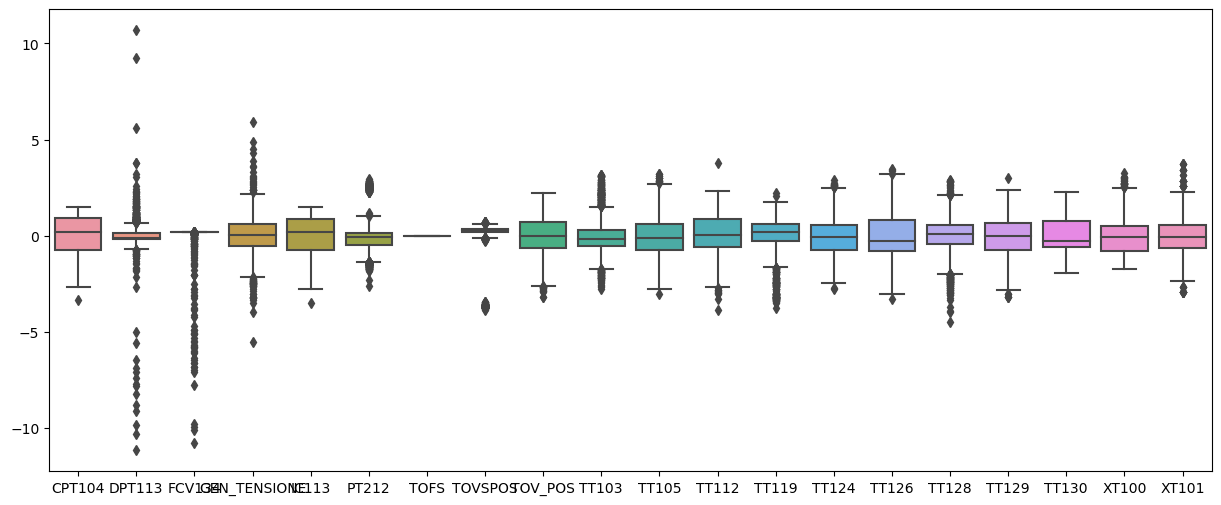

In [74]:
plt.figure(figsize=(15, 6))
sns.boxplot(X_scaled)

In [75]:
X_final = X_scaled.drop(['TOFS', 'TOFS', 'DPT113', 'FCV134', 'TOVSPOS'], axis=1)

data_processed = pd.concat([X_final, fault], axis=1)

# Export the processed dataset
path_x = "/Users/fabrizioniro/Library/CloudStorage/GoogleDrive-fabrizion18@gmail.com/My Drive/Tesi/faultdiag-thesis/tesi-python/data/data_processed.csv"
data_processed.to_csv(path_x, index=False)

data_processed

,CPT104,GEN_TENSIONE,IC113,PT212,TOV_POS,TT103,TT105,TT112,TT119,TT124,TT126,TT128,TT129,TT130,XT100,XT101,Fault
0,0.883274,-0.814951,0.854823,-0.025783,1.765200,-0.820087,0.965965,0.773948,0.805135,1.337211,-1.128067,-0.068788,-1.422122,-0.058423,1.342956,0.531226,0
1,0.845848,-0.051364,0.816195,-0.061000,1.765200,-0.924606,0.671964,0.731663,0.785257,1.034742,-1.116213,-0.017286,-1.347566,-0.090250,1.249340,0.821848,0
2,0.368861,-0.034452,0.355595,-0.075653,1.925981,-0.404904,0.550904,0.533631,0.483939,0.279106,-1.101581,-0.718582,-1.245898,-0.334857,1.062110,-0.340642,0
3,0.660309,0.695733,0.626271,-0.100589,1.675162,-0.548918,0.397952,0.606220,0.652213,0.666726,-1.040273,-0.445098,-1.421856,-0.229914,1.331254,0.821848,0
4,0.810014,0.620051,0.782665,-0.072172,1.874531,-0.718459,0.341801,0.750339,0.775023,0.659528,-1.247719,-0.121188,-1.336003,-0.161800,1.459975,1.693716,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1588,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1589,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1
1590,0.196063,0.051377,0.213791,-0.088445,-0.029118,-0.150593,-0.114586,0.049475,0.191280,-0.071911,-0.284206,0.095230,-0.026681,-0.291578,-0.061273,-0.050019,1


<AxesSubplot: >

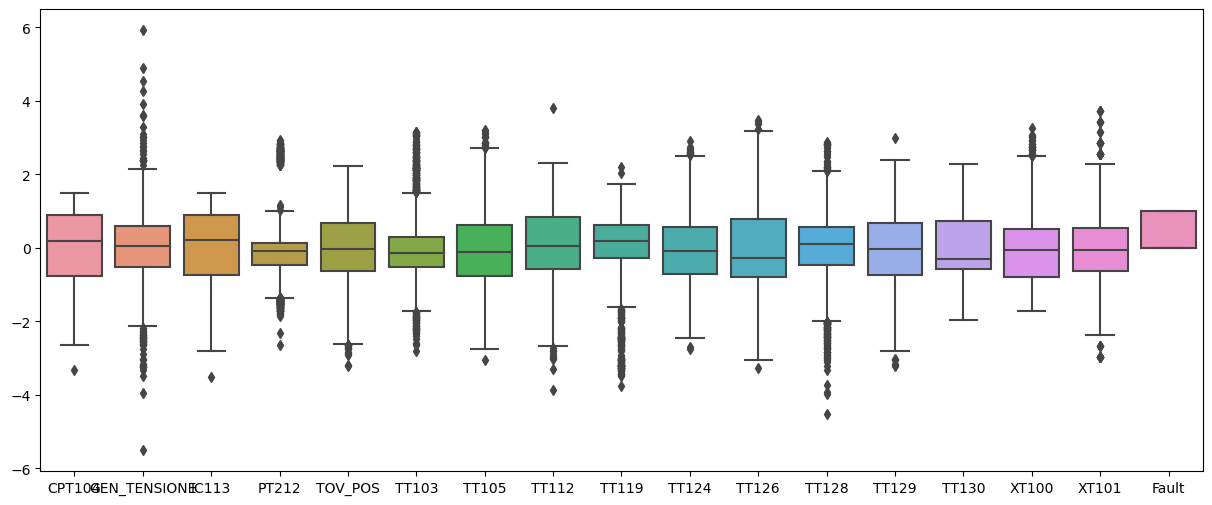

In [76]:
plt.figure(figsize=(15, 6))
sns.boxplot(data_processed)